In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
from google.colab import drive
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path dataset
data_dir = '/content/drive/MyDrive/Dataset4'

# Split dataset into training and validation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(500, 500),
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(500, 500),
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 699 images belonging to 4 classes.
Found 174 images belonging to 4 classes.


In [ ]:

# Membangun model CNN dengan Dropout
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(500,500,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 498, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 247, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 123, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 121, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 460800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    58,982,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,076,292 (225.36 MB)

 Trainable params: 59,076,292 (225.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callback untuk early stopping dan menyimpan model terbaik
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_model4.h5', save_best_only=True, monitor='val_loss')

In [ ]:
# Latih model
history = model.fit(
    train_generator,
    epochs=24,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[model_checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34s/step - accuracy: 0.2541 - loss: 6.7942 

11/11 ━━━━━━━━━━━━━━━━━━━━ 580s 51s/step - accuracy: 0.2549 - loss: 6.6033 - val_accuracy: 0.2989 - val_loss: 1.3842
Epoch 2/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3284 - loss: 1.3662

11/11 ━━━━━━━━━━━━━━━━━━━━ 116s 11s/step - accuracy: 0.3282 - loss: 1.3659 - val_accuracy: 0.3966 - val_loss: 1.3516
Epoch 3/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.4144 - loss: 1.3093

11/11 ━━━━━━━━━━━━━━━━━━━━ 134s 13s/step - accuracy: 0.4147 - loss: 1.3063 - val_accuracy: 0.4080 - val_loss: 1.2069
Epoch 4/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5027 - loss: 1.1228

11/11 ━━━━━━━━━━━━━━━━━━━━ 132s 12s/step - accuracy: 0.5028 - loss: 1.1201 - val_accuracy: 0.6437 - val_loss: 0.9573
Epoch 5/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5803 - loss: 0.9659

11/11 ━━━━━━━━━━━━━━━━━━━━ 131s 12s/step - accuracy: 0.5821 - loss: 0.9639 - val_accuracy: 0.6149 - val_loss: 0.8262
Epoch 6/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6750 - loss: 0.7759

11/11 ━━━━━━━━━━━━━━━━━━━━ 133s 13s/step - accuracy: 0.6761 - loss: 0.7735 - val_accuracy: 0.7356 - val_loss: 0.6888
Epoch 7/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7591 - loss: 0.6167 

11/11 ━━━━━━━━━━━━━━━━━━━━ 129s 12s/step - accuracy: 0.7598 - loss: 0.6155 - val_accuracy: 0.7701 - val_loss: 0.6140
Epoch 8/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8057 - loss: 0.5211

11/11 ━━━━━━━━━━━━━━━━━━━━ 143s 11s/step - accuracy: 0.8057 - loss: 0.5198 - val_accuracy: 0.7759 - val_loss: 0.5672
Epoch 9/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8865 - loss: 0.3371 

11/11 ━━━━━━━━━━━━━━━━━━━━ 137s 13s/step - accuracy: 0.8857 - loss: 0.3376 - val_accuracy: 0.8276 - val_loss: 0.3862
Epoch 10/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8928 - loss: 0.2766

11/11 ━━━━━━━━━━━━━━━━━━━━ 142s 11s/step - accuracy: 0.8941 - loss: 0.2738 - val_accuracy: 0.9023 - val_loss: 0.2845
Epoch 11/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9091 - loss: 0.2373 

11/11 ━━━━━━━━━━━━━━━━━━━━ 132s 13s/step - accuracy: 0.9092 - loss: 0.2368 - val_accuracy: 0.9655 - val_loss: 0.1379
Epoch 12/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 125s 12s/step - accuracy: 0.9349 - loss: 0.1689 - val_accuracy: 0.9540 - val_loss: 0.1426
Epoch 13/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9520 - loss: 0.1379

11/11 ━━━━━━━━━━━━━━━━━━━━ 114s 10s/step - accuracy: 0.9524 - loss: 0.1369 - val_accuracy: 0.9425 - val_loss: 0.1353
Epoch 14/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9689 - loss: 0.0835 

11/11 ━━━━━━━━━━━━━━━━━━━━ 133s 13s/step - accuracy: 0.9698 - loss: 0.0824 - val_accuracy: 0.9828 - val_loss: 0.0564
Epoch 15/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 131s 10s/step - accuracy: 0.9747 - loss: 0.0791 - val_accuracy: 0.9598 - val_loss: 0.1213
Epoch 16/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 101s 9s/step - accuracy: 0.9817 - loss: 0.0636 - val_accuracy: 0.9483 - val_loss: 0.1400
Epoch 17/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9624 - loss: 0.0854

11/11 ━━━━━━━━━━━━━━━━━━━━ 108s 10s/step - accuracy: 0.9633 - loss: 0.0840 - val_accuracy: 0.9943 - val_loss: 0.0416
Epoch 18/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9867 - loss: 0.0471 

11/11 ━━━━━━━━━━━━━━━━━━━━ 135s 13s/step - accuracy: 0.9866 - loss: 0.0469 - val_accuracy: 0.9885 - val_loss: 0.0390
Epoch 19/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 126s 12s/step - accuracy: 0.9920 - loss: 0.0349 - val_accuracy: 0.9713 - val_loss: 0.0612
Epoch 20/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9615 - loss: 0.0859

11/11 ━━━━━━━━━━━━━━━━━━━━ 113s 11s/step - accuracy: 0.9622 - loss: 0.0851 - val_accuracy: 1.0000 - val_loss: 0.0192
Epoch 21/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 127s 12s/step - accuracy: 0.9801 - loss: 0.0696 - val_accuracy: 1.0000 - val_loss: 0.0312
Epoch 22/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 103s 10s/step - accuracy: 0.9958 - loss: 0.0264 - val_accuracy: 0.9885 - val_loss: 0.0424
Epoch 23/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 102s 9s/step - accuracy: 0.9941 - loss: 0.0255 - val_accuracy: 0.9885 - val_loss: 0.0480
Epoch 24/24
11/11 ━━━━━━━━━━━━━━━━━━━━ 102s 9s/step - accuracy: 0.9917 - loss: 0.0249 - val_accuracy: 0.9943 - val_loss: 0.0213


In [ ]:
# Evaluasi model
y_true = []
y_pred = []

for i in range(len(validation_generator)):
    x_batch, y_batch = validation_generator[i]
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [ ]:
# Mendapatkan nama kelas
class_names = list(train_generator.class_indices.keys())

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names), '\n\n')

              precision    recall  f1-score   support

  2T-C32BG1I       1.00      1.00      1.00        40
  2T-C32DC1I       1.00      0.93      0.96        42
  2T-C32DF1I       0.95      1.00      0.97        52
  2T-C55EK1I       1.00      1.00      1.00        40

    accuracy                           0.98       174
   macro avg       0.99      0.98      0.98       174
weighted avg       0.98      0.98      0.98       174
 




In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_pred, class_names):
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
    y_pred_bin = label_binarize(y_pred, classes=range(len(class_names)))

    plt.figure(figsize=(10, 7))
    for i, class_name in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
        plt.plot(recall, precision, label=f'Class {class_name}')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

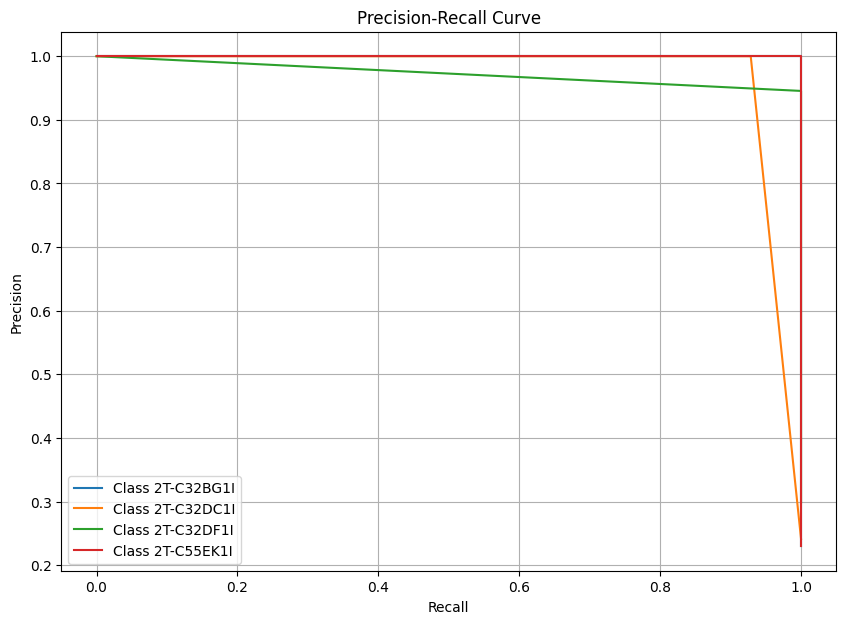

In [ ]:
# Contoh pemanggilan fungsi
plot_precision_recall_curve(y_true, y_pred, class_names)

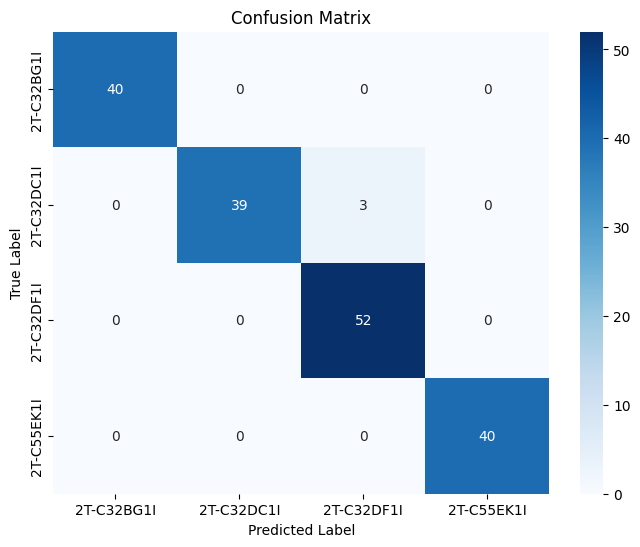

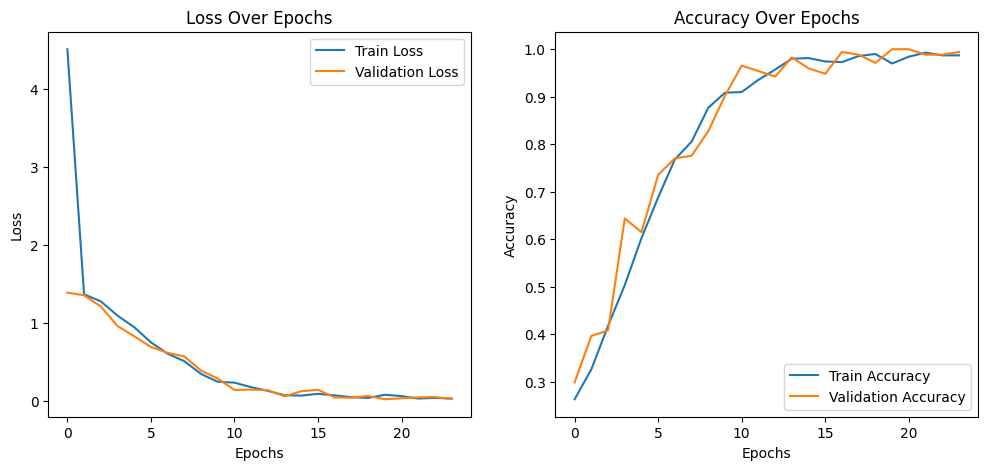

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training history (loss & accuracy)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Loss Over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy Over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

In [ ]:
# Load gambar untuk prediksi
img_path = '/content/drive/MyDrive/Resize 500 x 500/Testing/Image_7.jpeg'
img = image.load_img(img_path, target_size=(500,500), color_mode='rgb')
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Resize 500 x 500/Testing/Image_7.jpeg'

In [ ]:
# Prediksi
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f'Predicted Class: {class_names[predicted_class]}')